In [1]:
%matplotlib inline
#
from LRGSG_package.LRGSG import *
from LRGSG_package.LRGSG_plots import imshow_colorbar_caxdivider, generate_maxpercdiff_colormap
from LRGSG_package.LRGSG_utils import move_to_rootf, width_interval, dv, boolean_overlap_fraction
from LRGSG_package.nx_patches import signed_spectral_layout, get_kth_order_neighbours
#
move_to_rootf(print_tf=True)

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


In [2]:
side = 100
pflip = 0.1
#
sqlatt = Lattice2D(  #
    side1=side,
    geometry="squared",
    import_on=False,
    pflip=pflip
)
lrgsg = SignedLaplacianAnalysis(  #
    system=sqlatt, initCond="all_1", t_steps=10, no_obs=200
)
# middlenode = theLattice.N//2+theLattice.side1//2
# neg_weightsH = {(middlenode, middlenode+1): -1}
# theLattice.flip_sel_edges(neg_weightsH, 'H')
#
sqlatt.flip_random_fract_edges()
ising_dyn = IsingDynamics(
    system=sqlatt, T=0.2, nstepsIsing=2000, IsingIC="ground_state",
    MODE_RUN="C"
)
if not sqlatt.import_on:
    sqlatt.export_graph_pickle()
    sqlatt.export_adj_bin()

In [3]:
ising_dyn.init_ising_dynamics()
ising_dyn.find_ising_clusters()
ising_dyn.mapping_nodes_to_clusters()
if ising_dyn.MODE_RUN == "C":
    ising_dyn.export_ising_clust()
    ising_dyn.export_s_init()

[ 1. -1. -1. ...  1.  1.  1.]


In [ ]:
ising_dyn.run()

100%|██████████| 2000/2000 [06:07<00:00,  5.44it/s]


In [7]:
b = list(sqlatt.H.edges(data='weight'))

In [8]:
arr = np.fromfile("src/LRGSG_package/tmp_stuff/test.bin", dtype='float64')

In [6]:
ising_dyn.magn

[534.0,
 408.0,
 312.0,
 354.0,
 394.0,
 360.0,
 364.0,
 440.0,
 442.0,
 502.0,
 406.0,
 404.0,
 368.0,
 358.0,
 344.0,
 390.0,
 384.0,
 346.0,
 372.0,
 420.0,
 396.0,
 368.0,
 406.0,
 340.0,
 390.0,
 234.0,
 418.0,
 284.0,
 320.0,
 418.0,
 386.0,
 346.0,
 436.0,
 382.0,
 394.0,
 458.0,
 350.0,
 362.0,
 318.0,
 334.0,
 274.0,
 290.0,
 396.0,
 348.0,
 398.0,
 428.0,
 332.0,
 344.0,
 376.0,
 372.0,
 372.0,
 406.0,
 310.0,
 438.0,
 400.0,
 416.0,
 294.0,
 338.0,
 380.0,
 362.0,
 386.0,
 340.0,
 328.0,
 270.0,
 262.0,
 178.0,
 308.0,
 284.0,
 270.0,
 298.0,
 252.0,
 210.0,
 278.0,
 160.0,
 134.0,
 260.0,
 158.0,
 164.0,
 236.0,
 246.0,
 212.0,
 244.0,
 204.0,
 114.0,
 132.0,
 108.0,
 96.0,
 246.0,
 260.0,
 234.0,
 300.0,
 292.0,
 260.0,
 226.0,
 214.0,
 172.0,
 272.0,
 14.0,
 154.0,
 192.0,
 244.0,
 130.0,
 230.0,
 212.0,
 308.0,
 204.0,
 290.0,
 250.0,
 336.0,
 326.0,
 274.0,
 248.0,
 250.0,
 192.0,
 208.0,
 214.0,
 176.0,
 186.0,
 226.0,
 166.0,
 192.0,
 164.0,
 188.0,
 178.0,
 198.0,
 1

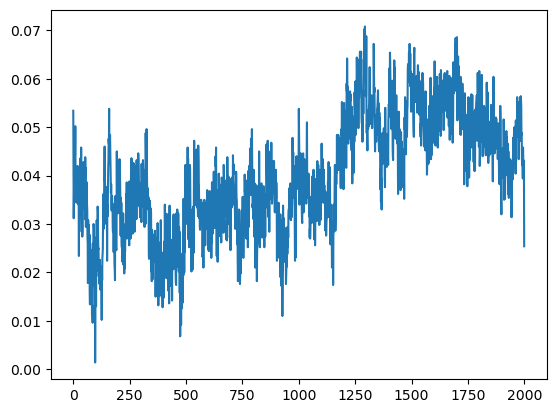

In [9]:
plt.plot(np.array(ising_dyn.magn)/ising_dyn.system.N)
# plt.xscale('log')
# plt.yscale('log')

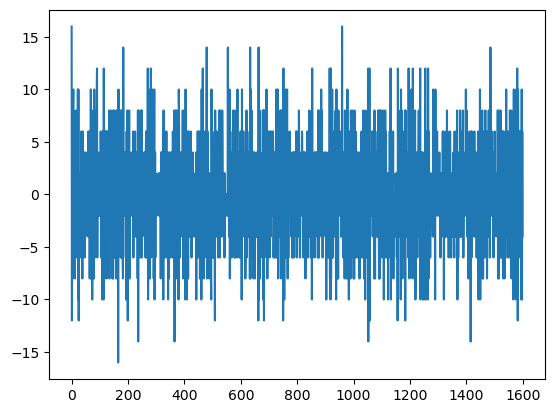

exit function


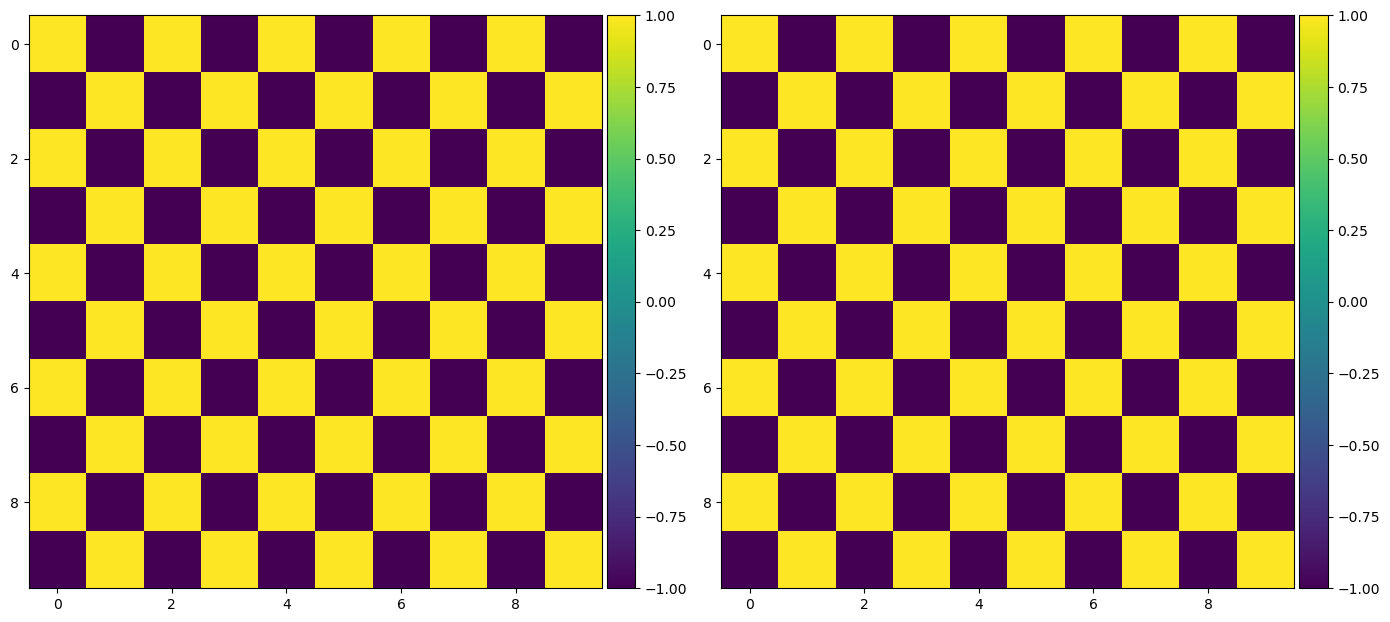

In [20]:
bineigv = sqlatt.bin_eigV()
binmagn = ising_dyn.m
fig, ax = plt.subplots(ncols=2, figsize=(14, 8))
im1 = ax[0].imshow(binmagn.reshape(sqlatt.side1, sqlatt.side2))
imshow_colorbar_caxdivider(im1, ax[0])
im2 = ax[1].imshow(bineigv.reshape(sqlatt.side1, sqlatt.side2))
imshow_colorbar_caxdivider(im2, ax[1])
fig.tight_layout()

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [7]:
boolean_overlap_fraction((bineigv > 0), (binmagn > 0))

0.95

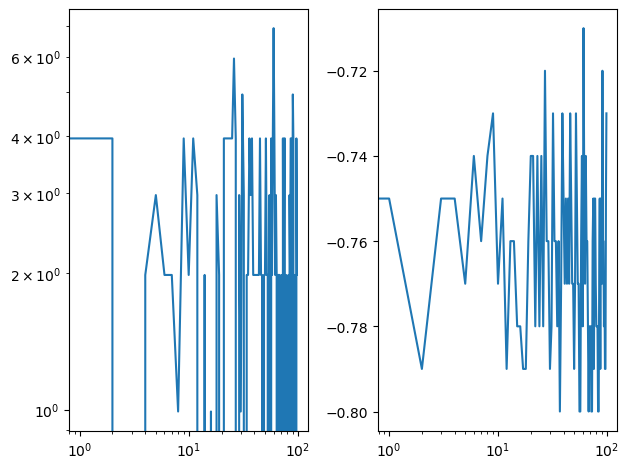

In [8]:
fig, ax = plt.subplots(ncols=2)
ax[0].plot(np.abs(dv(np.array(ising_dyn.ene))))
ax[0].set_yscale('log')
ax[0].set_xscale('log')
#
ax[1].plot(-np.array(ising_dyn.ene)/sqlatt.N)
ax[1].set_xscale('log')
fig.tight_layout()


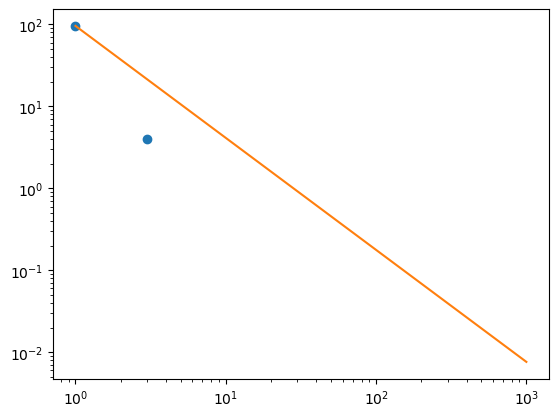

In [9]:
# fare averages e controllare 2.05
# percolation clusters
# vedere per diverse p
# 
distr = np.unique(ising_dyn.mapping, return_counts=True)
zipf  = sorted(distr[1], reverse=True)
plt.plot(np.linspace(1, len(zipf)+1, num=len(zipf)), zipf, 'o')
plt.plot(np.logspace(0, 3), max(zipf)*(np.logspace(0, 2))**-2.05)
# plt.hist(distr[1])
plt.yscale('log')
plt.xscale('log')

In [10]:
bin_counts, bin_edges = np.histogram(lrgsg.mapping)
bin_centres = (bin_edges[:-1] + bin_edges[1:]) / 2

AttributeError: 'SignedLaplacianAnalysis' object has no attribute 'mapping'

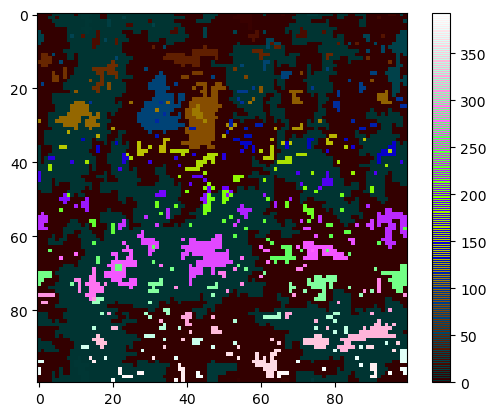

In [ ]:
def map_tuple_to_numeric(tuple_value):
    # You can use a weighted sum of the tuple elements as an example
    # Adjust the weights as needed based on your data
    weight = [0.1, 0.2, 0.5]
    numeric_value = np.sum(tuple_value * weight)
    return numeric_value


vfunc = np.vectorize(map_tuple_to_numeric)
max_diff_cmap = generate_maxpercdiff_colormap(lrgsg.numIsing_cl, 2)
# Apply the mapping function to the entire 'result_array'
numeric_array = vfunc(lrgsg.mapping)
plt.imshow(
    lrgsg.mapping.astype(float),
    cmap=max_diff_cmap,
)
plt.colorbar()

In [ ]:
#edge list
#indici di cluster
#inizializzazione stato
#

In [ ]:
idx0 = set(np.arange(0, lrgsg.system.N)) - set(sorted(lrgsg.biggestIsing_cl))
idx2Dcl = np.array([[i//lrgsg.system.side1, divmod(i, lrgsg.system.side2)[1]] for i in lrgsg.biggestIsing_cl])
idx2D = np.array([[i//lrgsg.system.side1, divmod(i, lrgsg.system.side2)[1]] for i in idx0])

In [ ]:
idx2D = idx2D[:, 0], idx2D[:, 1]
idx2Dcl = idx2Dcl[:, 0], idx2Dcl[:, 1]

In [ ]:

sum(lrgsg.magn_array.reshape(lrgsg.system.side1, lrgsg.system.side2)[idx2Dcl])/len(lrgsg.magn_array[lrgsg.biggestIsing_cl])

-0.7109227871939736

In [ ]:
lrgsg.magn_array[lrgsg.biggestIsing_cl]

array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
a = lrgsg.magn_array.reshape(lrgsg.system.side1, lrgsg.system.side2)[idx2Dcl]

In [ ]:


lrgsg.magn_array.reshape(lrgsg.system.side1, lrgsg.system.side2)[idx2D] = 0

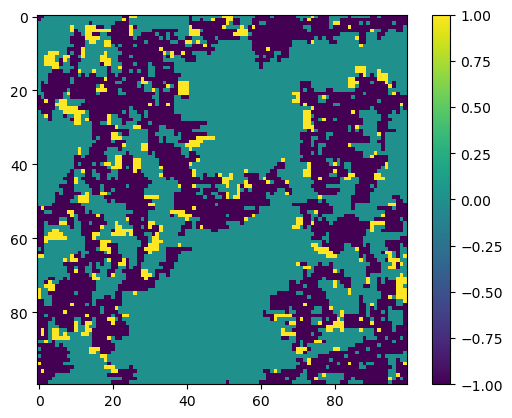

In [ ]:
plt.imshow(lrgsg.magn_array.reshape(lrgsg.system.side1, lrgsg.system.side2))
plt.colorbar()

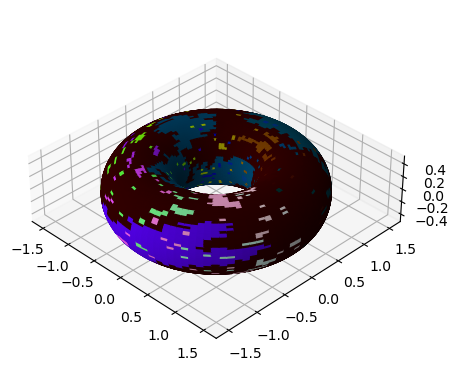

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib

# random colors
theta_dim, phi_dim = 100, 100
a = lrgsg.mapping.astype(float)

# Generating Torus Mesh
angle = np.linspace(0, 2 * np.pi, 100)
theta, phi = np.meshgrid(angle, angle)
r, R = .5, 1
X = (R + r * np.cos(phi)) * np.cos(theta)
Y = (R + r * np.cos(phi)) * np.sin(theta)
Z = r * np.sin(phi)

# compute the indexes
t = np.floor(theta / (2 * np.pi) * (theta_dim - 1)).astype(int)
p = np.floor(phi / (2 * np.pi) * (phi_dim - 1)).astype(int)
# extract the color value from the matrix
colors = a[t, p]
# apply a colormap to the normalized color values
norm = Normalize(vmin=colors.min(), vmax=colors.max())
cmap = max_diff_cmap#matplotlib.colormaps.get_cmap("viridis")
normalized_colors = cmap(norm(colors))

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, facecolors=normalized_colors)
ax.set_aspect("equal")
ax.view_init(elev=35., azim=-45)
plt.show()